<a href="https://colab.research.google.com/github/leobonn1/devai/blob/main/iaam_trabalho1_leonardo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X = data
y = target

In [3]:
X.shape

(506, 13)

In [4]:
y.shape

(506,)

0


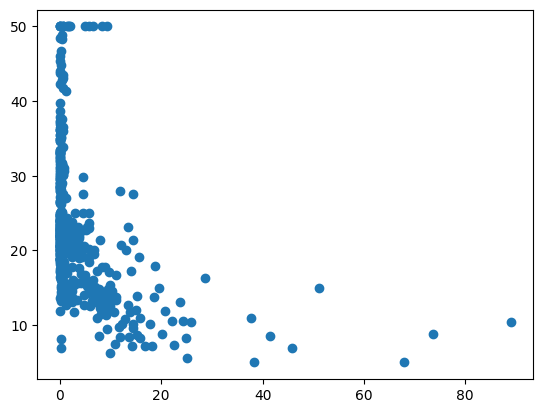

1


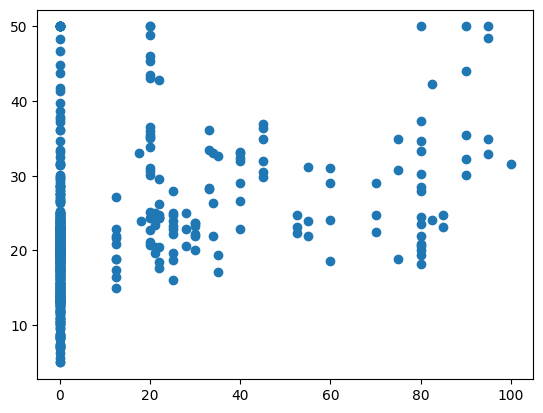

2


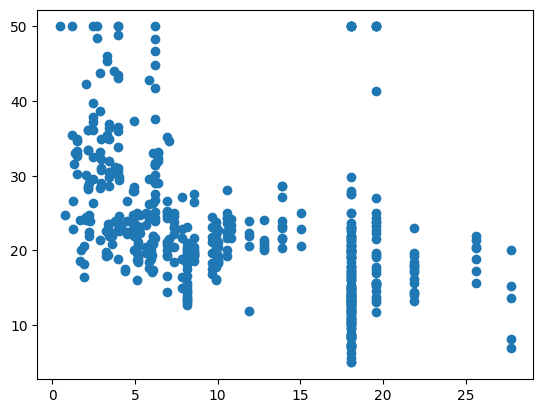

3


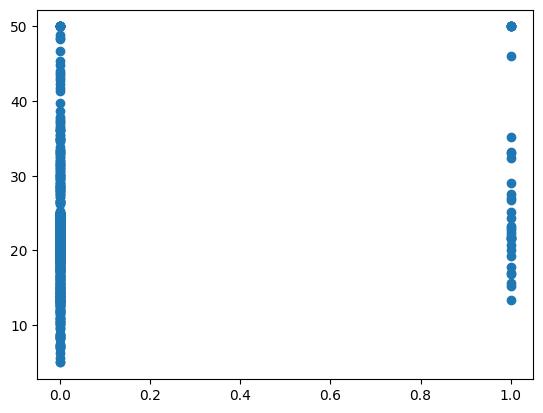

4


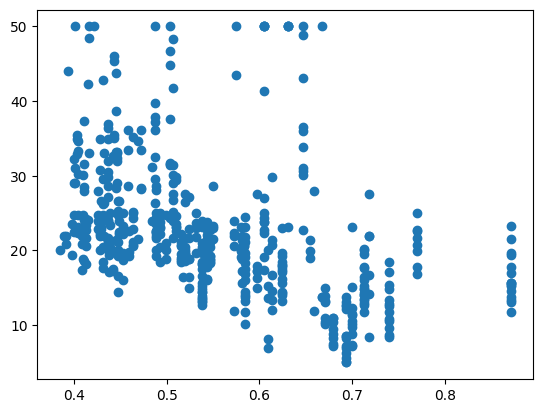

5


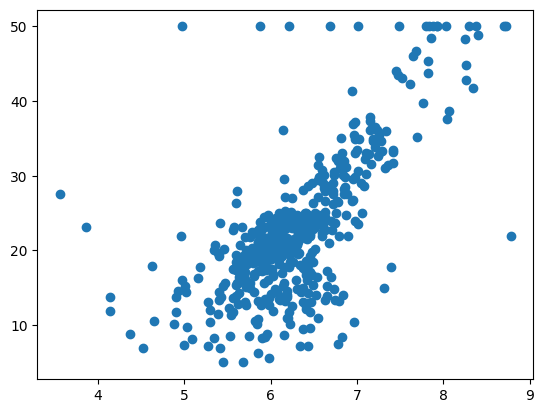

6


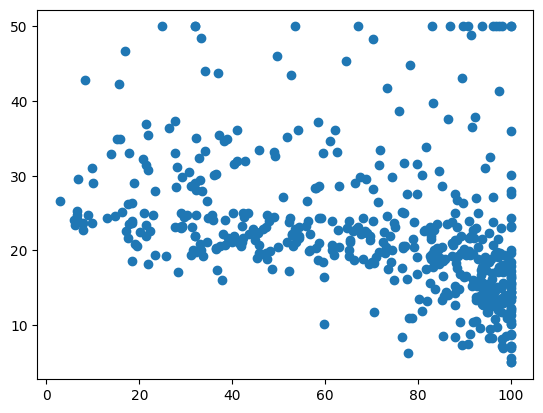

7


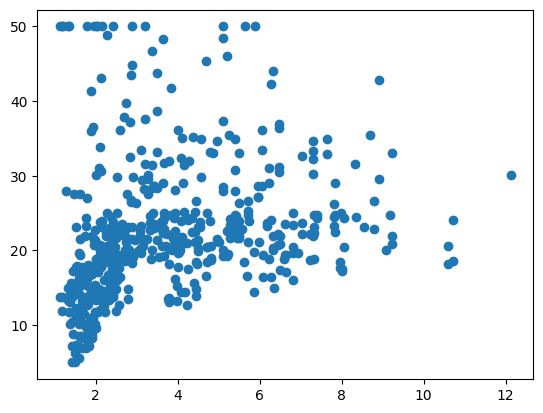

8


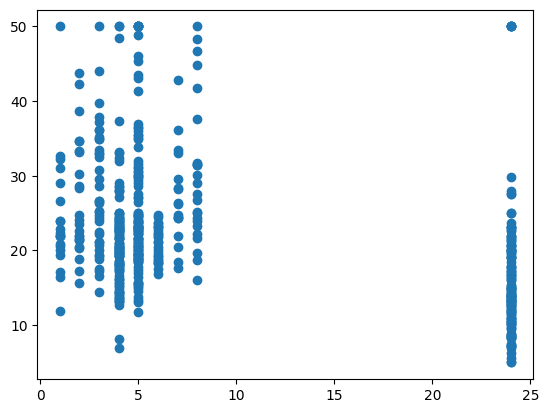

9


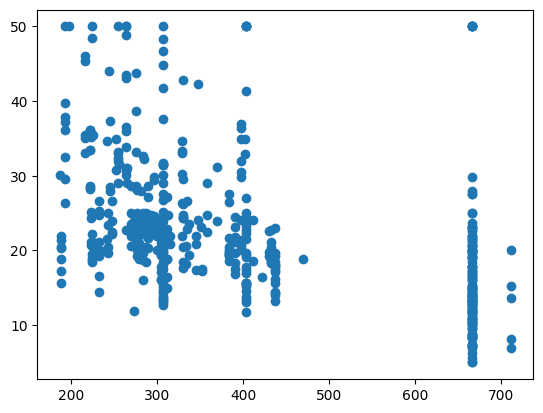

10


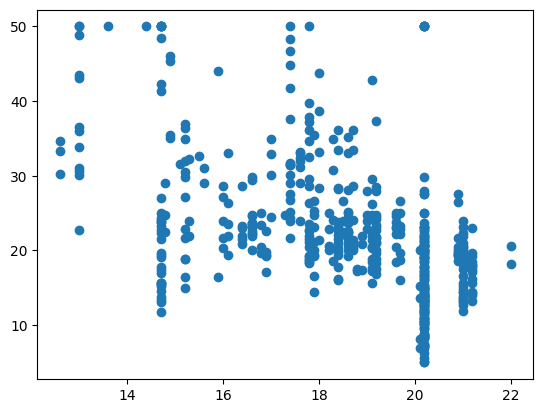

11


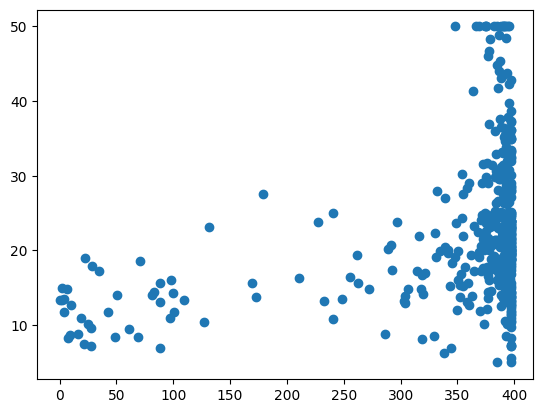

12


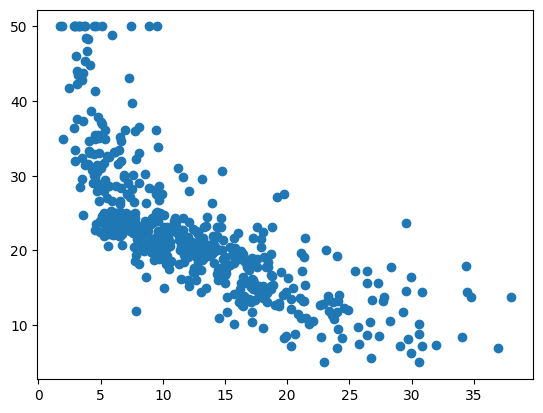

In [2]:
import matplotlib.pylab as plt

for i in range(X.shape[1]):
  print(i)
  plt.scatter(X[:,i], y)
  plt.show()

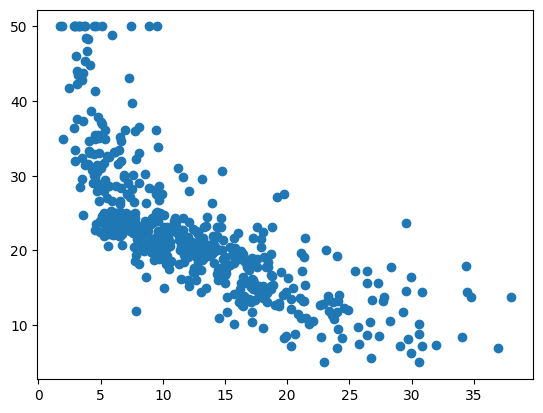

In [7]:
X12 = X[:,12:13]
plt.scatter(X12,y)
plt.show()

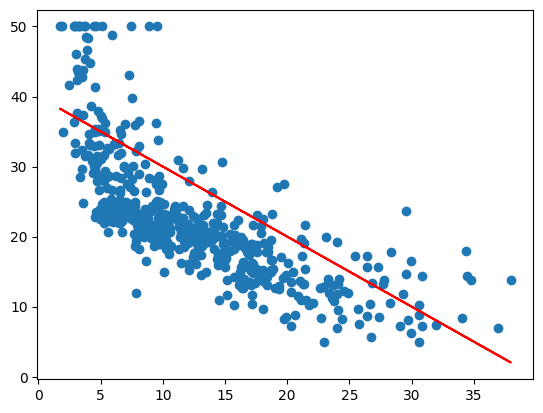

In [8]:
def modelo_linear(X, a, b):
  y = a*X + b
  return y

ypred = modelo_linear(X12, -1,40)
plt.scatter(X12, y)
plt.plot(X12, ypred, 'r')
plt.show()

In [10]:
def mae(y, ypred):
  yDiff = ypred - y.reshape(-1,1)
  yAbs = abs(yDiff)
  errorSum = sum(yAbs)
  mae = errorSum/len(yAbs)
  return mae

ypred = modelo_linear(X12, -1, 40)
print(mae(y, ypred))

[6.96547431]


In [16]:
def mse(y, ypred):
  yDiff = ypred - y.reshape(-1,1)
  yDiffSquare = yDiff**2
  errorSum = sum(yDiffSquare)
  mse = errorSum/len(yDiffSquare)
  return mse

ypred = modelo_linear(X12, -1, 40)
mse(y,ypred)

array([61.78580296])

In [12]:
from math import sqrt
def rmse(y, ypred):
  yDiff = ypred - y.reshape(-1,1)
  yDiffSquare = yDiff**2
  errorSum = sum(yDiffSquare)
  mse = errorSum/len(yDiffSquare)
  return sqrt(mse)

ypred = modelo_linear(X12, -1, 40)
rmse(y,ypred)

7.860394580708203

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(y,ypred):
  mse = mean_squared_error(y, ypred)
  return sqrt(mse)

ypred = modelo_linear(X12, -1, 40)
rmse(y,ypred)

7.860394580708203

592.1469169960474
61.78580296442688


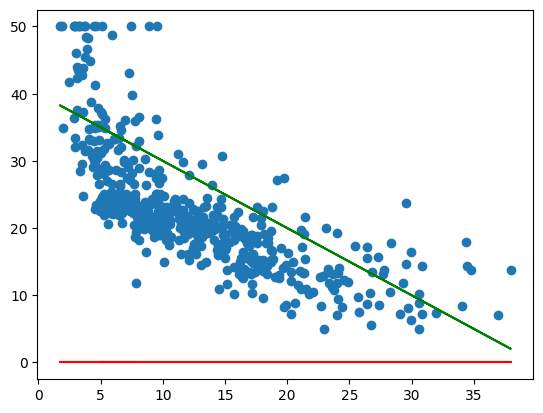

In [19]:
from sklearn.metrics import mean_squared_error

class regressao_linear():
  def __init__(self):
    self.a = 0
    self.b = 0

  def fit(self, X, y):
    self.a = -1
    self.b = 40
  def predict(self, X):
    y = self.a*X + self.b
    return y
plt.scatter(X12,y)
modelo = regressao_linear()
ypred = modelo.predict(X12)
print(mean_squared_error(y,ypred))
plt.plot(X12, ypred, 'r')

modelo.fit(X12, y)

ypred = modelo.predict(X12)
print(mean_squared_error(y,ypred))
plt.plot(X12, ypred, 'g')
plt.show()

24.334069059572577
6.20346413306178


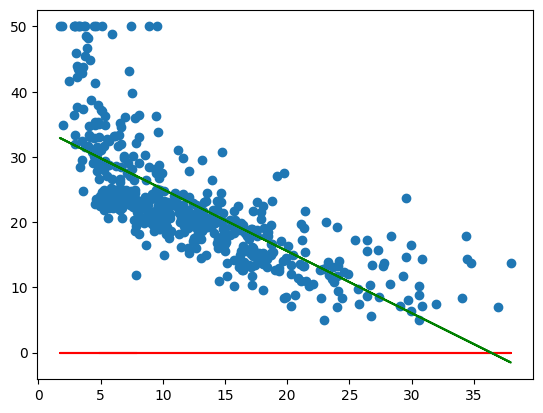

a: -0.9500317226790728, b: 34.55355094057261


In [20]:
from sklearn.metrics import mean_squared_error

class regressao_linear():
  def __init__(self):
    self.a = 0
    self.b = 0

  def fit(self, X, y):
    for i in range(500):
      ypred = self.predict(X)
      erro = ypred - y.reshape(-1,1)
      ajusteB = (sum(erro)/len(erro))
      self.b = self.b - 0.1 * ajusteB[0]

      ajusteA = sum([erro[i]*X[i] for i in range(X.shape[0])])/sum(X)
      self.a = self.a - ajusteA[0] * 0.1

  def predict(self, X):
    y = self.a*X + self.b
    return y
plt.scatter(X12,y)
modelo = regressao_linear()
ypred = modelo.predict(X12)
print(rmse(y,ypred))
plt.plot(X12, ypred, 'r')

modelo.fit(X12, y)

ypred = modelo.predict(X12)
print(rmse(y,ypred))
plt.plot(X12, ypred, 'g')
plt.show()

print(f'a: {modelo.a}, b: {modelo.b}')

24.334069059572577
6.20346413306178


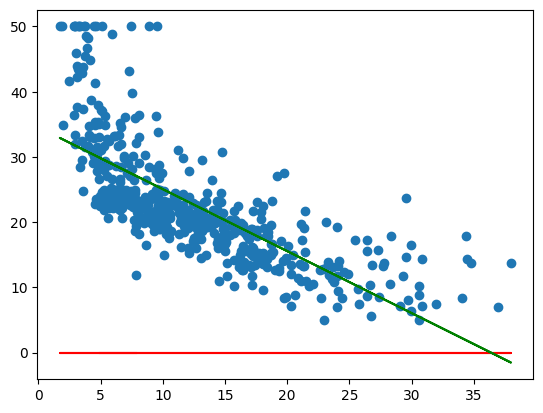

W: [[34.55355094]
 [-0.95003172]]


In [27]:
from sklearn.metrics import mean_squared_error
import numpy as np

class regressao_linear():
  def __init__(self):
    self.W = np.zeros((2,1))

  @staticmethod
  def addBias(X):
    bias = np.ones((X.shape[0],1))
    X_b = np.concatenate((bias,X),axis = 1)
    return X_b

  def fit(self, X, y):
    X_b = self.addBias(X)
    for _ in range(500):
      ypred = self.predict(X)
      erro = ypred - y.reshape(-1,1)
      ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1,1)
      self.W = self.W - 0.1 * ajuste

  def predict(self, X):
    X_b = self.addBias(X)
    y = X_b.dot(self.W)
    return y

plt.scatter(X12,y)
modelo = regressao_linear()
ypred = modelo.predict(X12)
print(rmse(y,ypred))
plt.plot(X12, ypred, 'r')

modelo.fit(X12, y)

ypred = modelo.predict(X12)
print(rmse(y,ypred))
plt.plot(X12, ypred, 'g')
plt.show()

print(f'W: {modelo.W}')

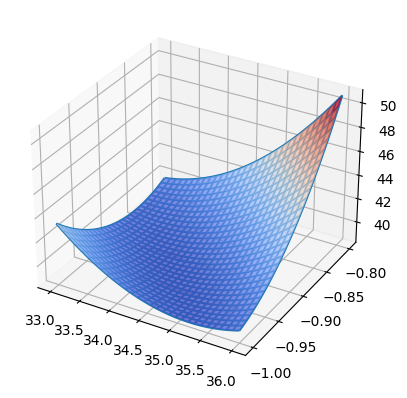

In [34]:
from sklearn.metrics import mean_squared_error
import numpy as np

w0 = np.linspace(33, 36, 30)
w1 = np.linspace(-1, -0.8, 30)

def z_function(W0, W1):
  modelo = regressao_linear()
  Erro = np.empty(W0.shape)
  for j in range(Erro.shape[0]):
    for k in range(Erro.shape[1]):
      modelo.W[0] = W0[j][k]
      modelo.W[1] = W1[j][k]
      ypred = modelo.predict(X12)
      mse = mean_squared_error(y, ypred)
      Erro[j][k] = mse
  return Erro

ax = plt.axes(projection = "3d")
W0, W1 = np.meshgrid(w0,w1)
Erro = z_function(W0,W1)

ax.plot_wireframe(W0, W1, Erro)
ax.plot_surface(W0, W1, Erro, rstride= 1, cstride = 1, alpha = 0.75,
                cmap='coolwarm', edgecolor='none')

plt.show()

In [31]:
w0

array([33.        , 33.10344828, 33.20689655, 33.31034483, 33.4137931 ,
       33.51724138, 33.62068966, 33.72413793, 33.82758621, 33.93103448,
       34.03448276, 34.13793103, 34.24137931, 34.34482759, 34.44827586,
       34.55172414, 34.65517241, 34.75862069, 34.86206897, 34.96551724,
       35.06896552, 35.17241379, 35.27586207, 35.37931034, 35.48275862,
       35.5862069 , 35.68965517, 35.79310345, 35.89655172, 36.        ])

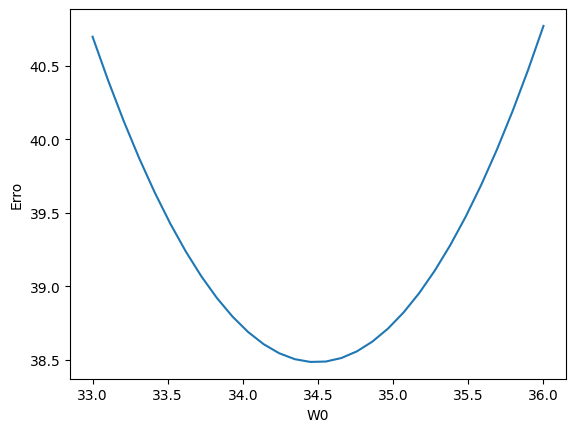

In [32]:
plt.ylabel("Erro")
plt.xlabel("W0")
i = 8
plt.plot(W0[i,:],Erro[i,:])
plt.show()

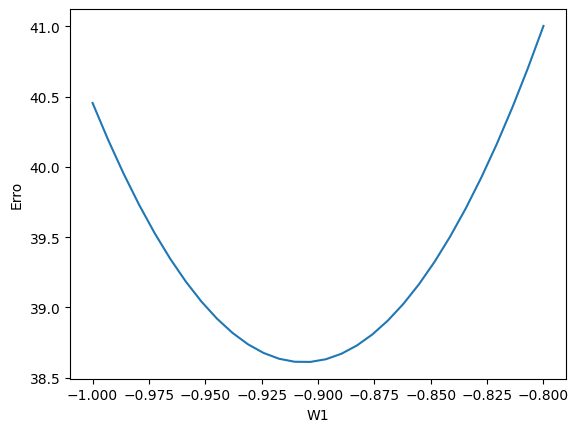

In [33]:
plt.ylabel("Erro")
plt.xlabel("W1")
i = 8
plt.plot(W1[:,i],Erro[:,i])
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

class regressao_linear():
  def __init__(self):
    self.W = np.zeros((2,1))
    self.wh = []

  @staticmethod
  def addBias(X):
    bias = np.ones((X.shape[0],1))
    X_b = np.concatenate((bias,X),axis = 1)
    return X_b

  def fit(self, X, y):
    X_b = self.addBias(X)
    for _ in range(500):
      ypred = self.predict(X)
      erro = ypred - y.reshape(-1,1)
      ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1,1)
      self.W = self.W - 0.1 * ajuste
      ypred = self.predict(X)
      mse = mean_squared_error(y, ypred)
      self.wh.append([self.W[0,0], self.W[1,0], mse])

  def predict(self, X):
    X_b = self.addBias(X)
    y = X_b.dot(self.W)
    return y

plt.scatter(X12,y)
modelo = regressao_linear()
ypred = modelo.predict(X12)
print(rmse(y,ypred))
plt.plot(X12, ypred, 'r')

modelo.fit(X12, y)

ypred = modelo.predict(X12)
print(rmse(y,ypred))
plt.plot(X12, ypred, 'g')
plt.show()

print(f'W: {modelo.W}')